In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer.data)
x = cancer.data
y = cancer.target
print(x.shape)

cancer.keys(): 
dict_keys(['DESCR', 'target_names', 'feature_names', 'data', 'target'])
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [28]:
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [30]:
knn.predict([[3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5, 3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5]])
x_new = [[3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5, 3, 5, 4, 2, 5 ,3, 5, 4, 2, 5,3, 5, 4, 2, 5], [1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6,1, 2, 3, 4, 5 ,6]]
knn.predict(x_new)

array([1, 1])

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
knn.predict(x_new)

array([1, 1])

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
logreg.predict(x_new)

array([0, 0])

In [33]:
logreg = LogisticRegression()
logreg.fit(x, y)
logreg.predict(x)
y_pred = logreg.predict(x)
len(y_pred)

569

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9595782073813708


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9472759226713533


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y, y_pred))

1.0


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=30)

In [37]:
print(x_train.shape)
print(x_test.shape)

(341, 30)
(228, 30)


In [18]:
print(y_train.shape)
print(y_test.shape)

(341,)
(228,)


In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = logreg.predict(x_test)

In [21]:
print(metrics.accuracy_score(y_test, y_pred))

0.9342105263157895


In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9254385964912281


In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9342105263157895


In [43]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [25]:
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')


Text(0,0.5,'Testing Accuracy')

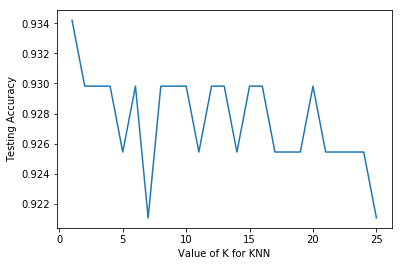

In [26]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')